In [6]:
#import os
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

import astropy.io.fits as pyfits
from astropy.time import Time

#import geopandas
#import sys
#sys.path.append('../pylib')
import kytime


fname = 'shk_kgd_lc1s.fits'
hdul = pyfits.open(fname)
hdu = hdul[1]
vtime = hdu.data.field("Time")
vobctimsel = hdu.data.field("OBCTIMSEL")
vlc1 = hdu.data.field("LC1")

vastime = kytime.mstime2astime(vtime)
vdatetime = vastime.to_datetime()
    
#vcut = np.logical_and(tstart<vtime, vtime<tstop)
vcut1 = vobctimsel==1 ### GPS OK
vcut2 = vobctimsel>=2
nvcut1 = (vcut1*1).sum()
nvcut2 = (vcut2*1).sum()
print("Total KGD_OK and GPS_OK data is %d (%d s)"%(nvcut1, nvcut1*16))
print("Total KGD_OK and GPS_NG data is %d (%d s)"%(nvcut2, nvcut2*16))

Total KGD_OK and GPS_OK data is 139417 (2230672 s)
Total KGD_OK and GPS_NG data is 24389 (390224 s)


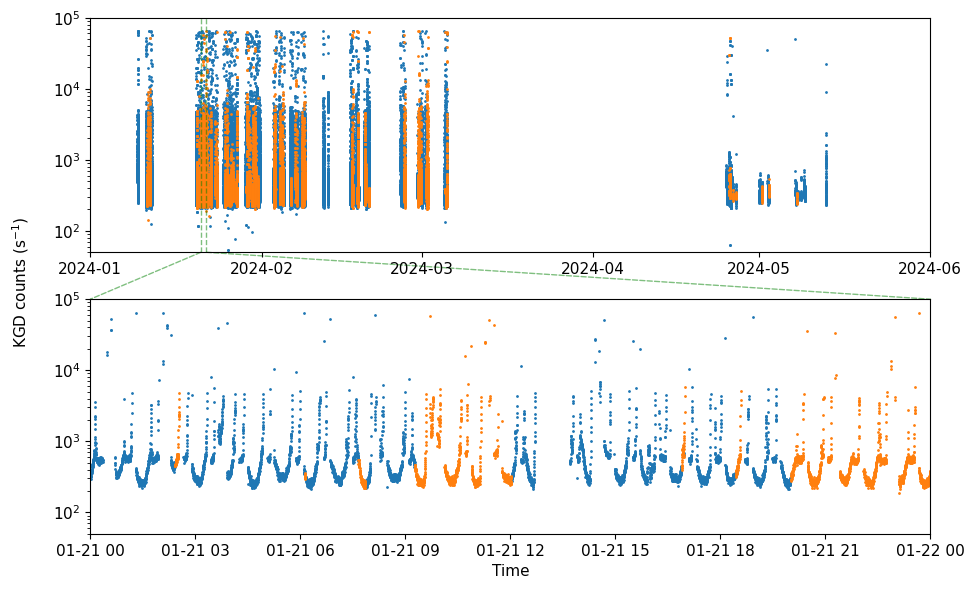

In [4]:
plt.rcParams["font.size"]= 11   
fig, axs = plt.subplots(2,1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=0.94, bottom=0.08, top=0.94, hspace=0.2)

axs[0].plot(vdatetime[vcut1], vlc1[vcut1], '.', ms=2)
axs[0].plot(vdatetime[vcut2], vlc1[vcut2], '.', ms=2)
axs[0].set_yscale('log')
axs[0].set_xlim(datetime(2024,1,1), datetime(2024,6,1))
    
axs[1].plot(vdatetime[vcut1], vlc1[vcut1], '.', ms=2)
axs[1].plot(vdatetime[vcut2], vlc1[vcut2], '.', ms=2)
axs[1].set_yscale('log')
axs[1].set_xlim(datetime(2024,1,20), datetime(2024,1,22))

ymi = 0.5e2
yma = 1.0e5
axs[0].set_ylim(ymi, yma)
axs[1].set_ylim(ymi, yma)
xmi1 = datetime(2024,1,21)
xma1 = datetime(2024,1,22)
axs[1].set_xlim(xmi1, xma1)

axs[0].vlines(xmi1, ymi, yma, color='g', ls='dashed', lw=1, alpha=0.5)
axs[0].vlines(xma1, ymi, yma, color='g', ls='dashed', lw=1, alpha=0.5)

xya =(xmi1, ymi)
xyb =(xmi1, yma)
con1 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs[0], axesB=axs[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)
xya =(xma1, ymi)
xyb =(xma1, yma)
con2 = ConnectionPatch(xyA=xya, xyB=xyb, coordsA="data", coordsB="data", axesA=axs[0], axesB=axs[1],
                       color="g", ls='dashed', lw=1, alpha=0.5)
axs[0].add_artist(con1)
axs[0].add_artist(con2)
    
axs[1].set_xlabel("Time")
ylab = fig.text(0.03, 0.5, "KGD counts (s$^{-1}$)",
                ha='center', va='center', rotation=90)
